# LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Upload Kaggle API Key to Google Colab:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (5).json to kaggle (5).json


# Step 2: Install Kaggle Library and Set API Key

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (5).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download Dataset

In [ ]:
# Download dataset from Kaggle
!kaggle datasets download -d arshid/iris-flower-dataset

iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d arshid/iris-flower-dataset

iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Step 4: Unzip the Dataset

In [ ]:
# Unzip the dataset
!unzip -q iris-flower-dataset.zip

# Importing Dataset

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.to_csv('iris_data.csv', index=False)

# DATA VISUALIZATION

# Display the pairplot for exploring relationships between features

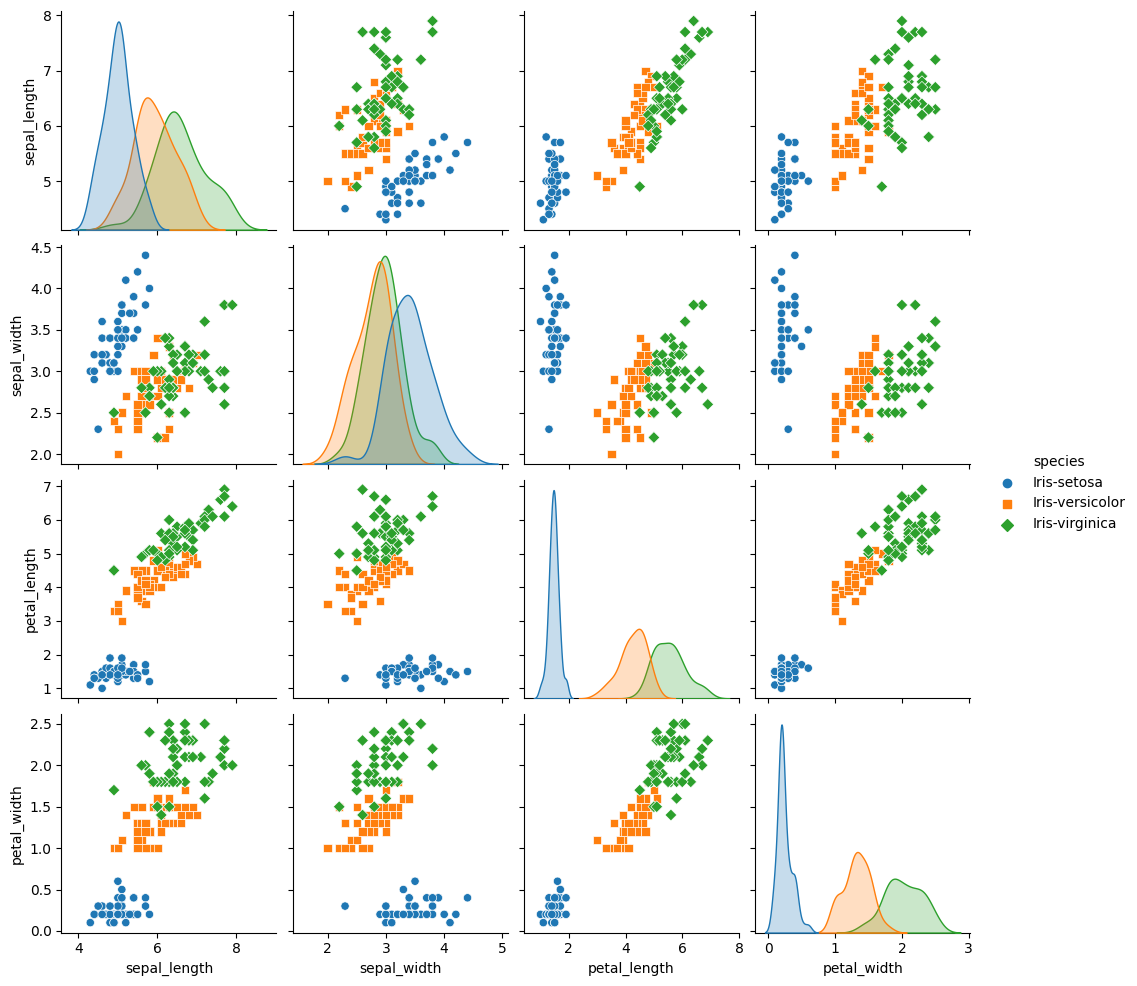

In [ ]:
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.show()

# Visualize the highest values of Sepal Length and Petal Length

In [ ]:
# Find highest and lowest values for each feature for each species
highest_values = df.groupby('species').max()
lowest_values = df.groupby('species').min()

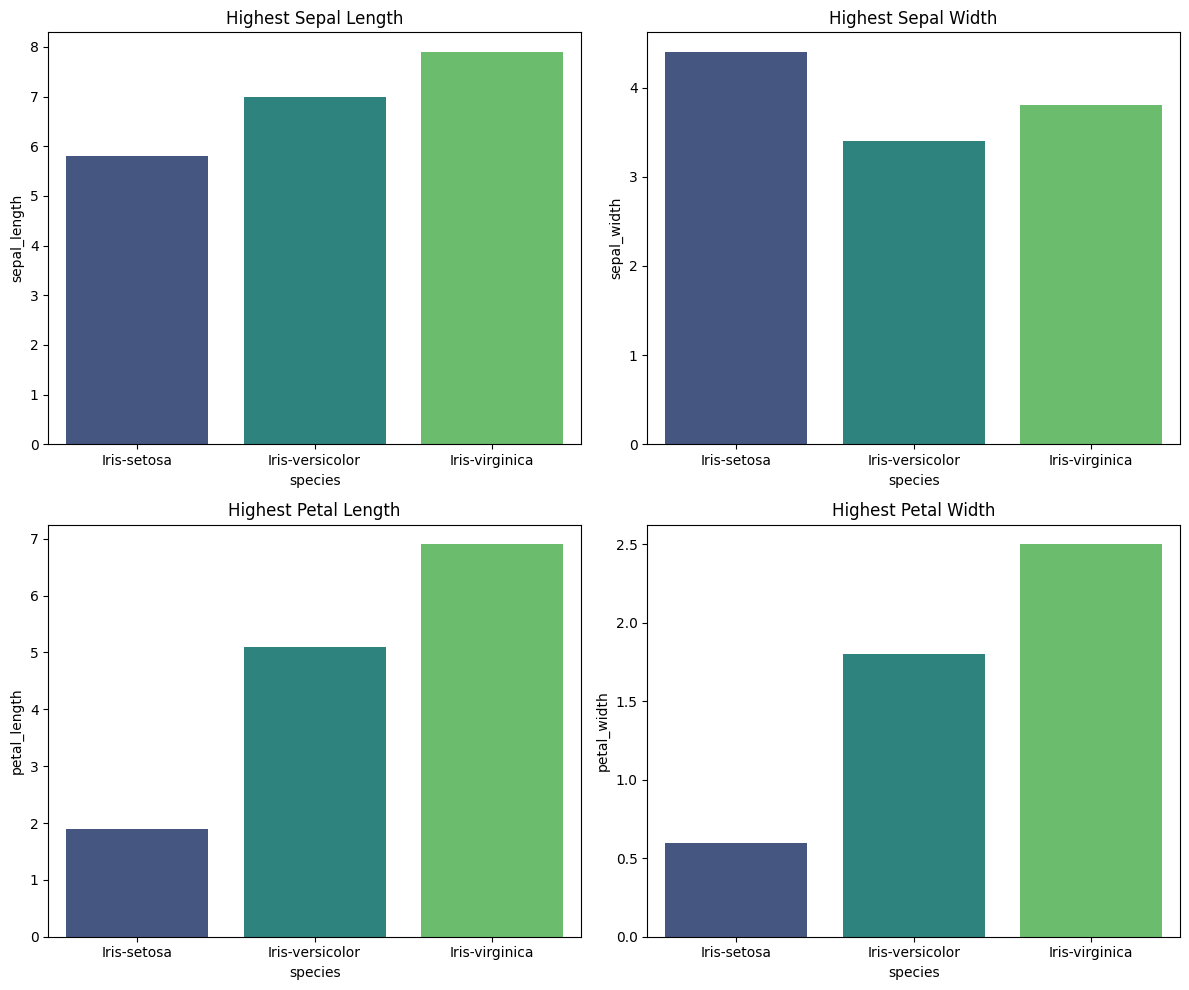

In [ ]:
# Find highest and lowest values for each feature for each species
highest_values = df.groupby('species').max()
lowest_values = df.groupby('species').min()

# Visualize the highest and lowest values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot highest values
sns.barplot(x='species', y='sepal_length', data=highest_values.reset_index(), ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Highest Sepal Length')

sns.barplot(x='species', y='sepal_width', data=highest_values.reset_index(), ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Highest Sepal Width')

sns.barplot(x='species', y='petal_length', data=highest_values.reset_index(), ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Highest Petal Length')

sns.barplot(x='species', y='petal_width', data=highest_values.reset_index(), ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Highest Petal Width')

plt.tight_layout()
plt.show()



# Visualize the Lowest values of Sepal Length and Petal Length

Text(0.5, 1.0, 'Lowest Petal Width')

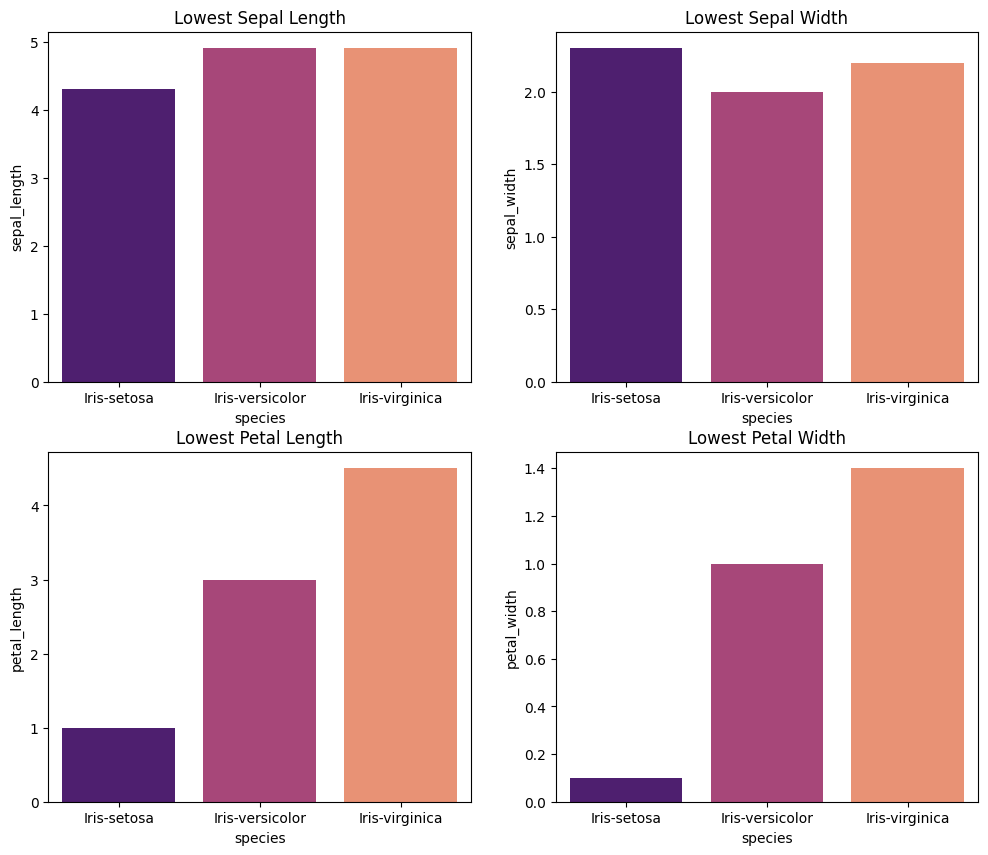

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Plot lowest values
sns.barplot(x='species', y='sepal_length', data=lowest_values.reset_index(), ax=axes[0, 0], palette='magma')
axes[0, 0].set_title('Lowest Sepal Length')

sns.barplot(x='species', y='sepal_width', data=lowest_values.reset_index(), ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Lowest Sepal Width')

sns.barplot(x='species', y='petal_length', data=lowest_values.reset_index(), ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Lowest Petal Length')

sns.barplot(x='species', y='petal_width', data=lowest_values.reset_index(), ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Lowest Petal Width')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

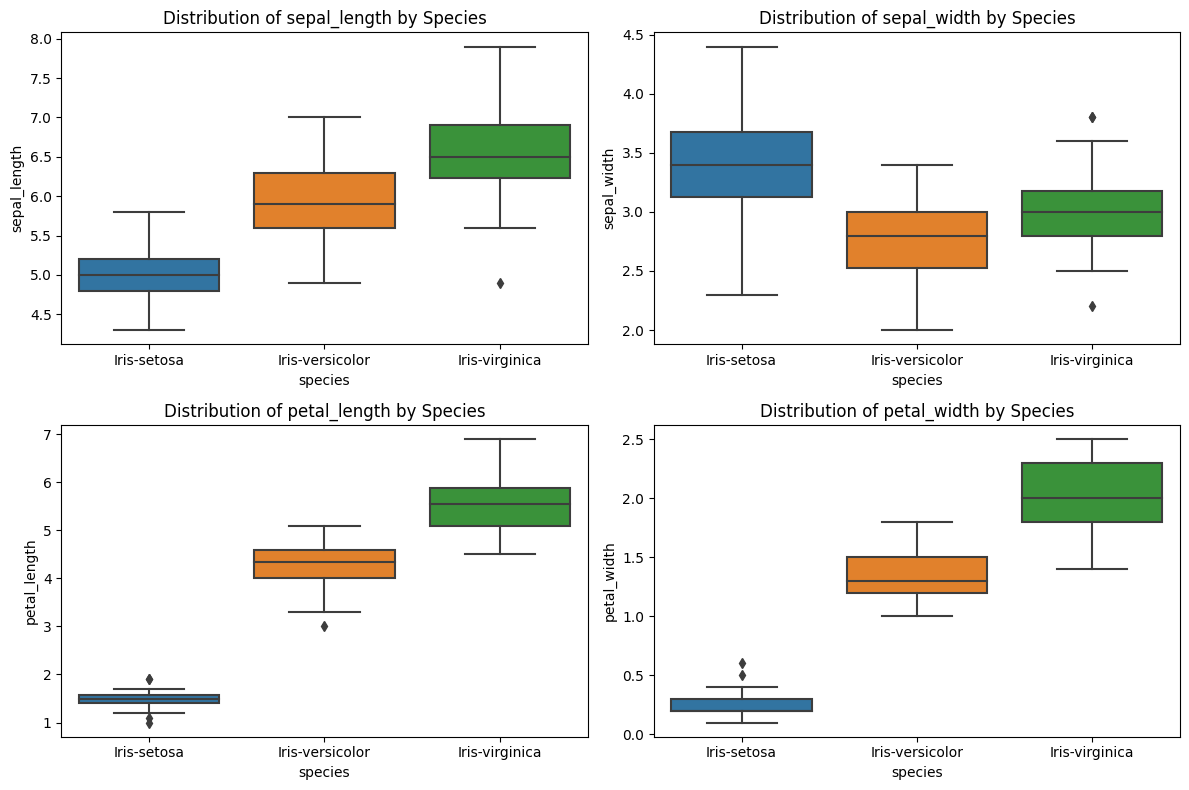

In [ ]:
# Boxplots for feature distributions
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()


<ipython-input-37-c4d684ebe919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


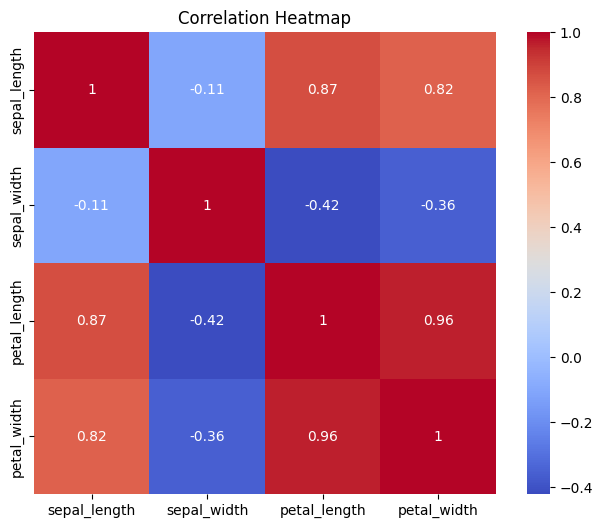

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


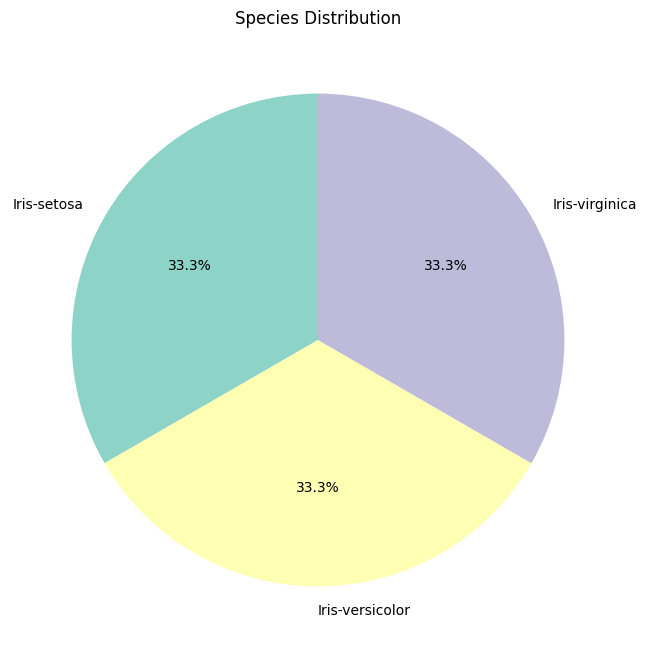

In [ ]:
# Pie chart for species distribution
plt.figure(figsize=(8, 8))
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Species Distribution')
plt.show()


# Split the data into features (X) and target (y)

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.to_csv('iris_X_train.csv', index=False)
X_train.to_csv('iris__test.csv', index=False)

# Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
scaler_save_path = "saved_scaler.pkl"
import joblib
joblib.dump(scaler, scaler_save_path)

['saved_scaler.pkl']

In [ ]:
X_test_scaled = scaler.transform(X_test)

# Train a k-nearest neighbors classifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
import joblib
from sklearn.metrics.pairwise import euclidean_distances

#Saving the Model
model_path = "knn_classifier_model.pkl"
joblib.dump(knn_classifier, model_path)

['knn_classifier_model.pkl']

In [ ]:
# Save the trained model
model_save_path = "saved_knn_classifier.pkl"
joblib.dump(knn_classifier, model_save_path)

['saved_knn_classifier.pkl']

# Make predictions on the test set

In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

# Confusion matrix heatmap

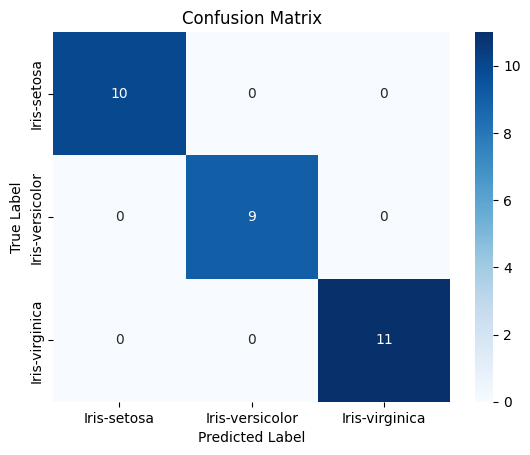

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report heatmap

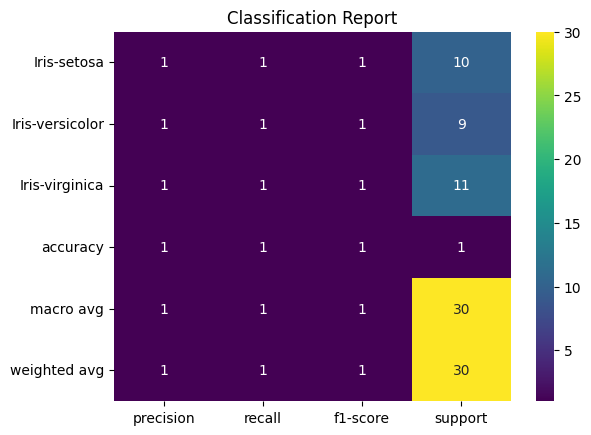

In [ ]:
classification_rep = classification_report(y_test, y_pred, target_names=df['species'].unique(), output_dict=True)
sns.heatmap(pd.DataFrame(classification_rep).transpose(), annot=True, cmap='viridis')
plt.title('Classification Report')
plt.show()

# Display the first few rows of the dataset


In [ ]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


3D Scatter Plot (Matplotlib):

The graph provides a comprehensive view of the relationships among sepal length, sepal width, and petal length in the Iris dataset. Each data point, color-coded by species (Setosa, Versicolor, or Virginica), contributes to the visualization of trends and clusters. Notably, Setosa exhibits a distinct cluster with smaller sepal length and width, while Versicolor and Virginica may overlap in certain regions, indicating variability in their sepal characteristics. The color-coded clusters enable the identification of characteristic ranges for each species, and overlapping areas hint at shared traits.

Correlation Heatmap (Seaborn or Matplotlib):

The correlation heatmap, reveals the correlation matrix of features. Strong correlations between features are represented by brighter colors, while weak correlations are depicted by darker shades. The bright region corresponds to petal length and petal width, indicating a strong positive correlation between these two features. This means that as the petal length increases, the petal width tends to increase as well. The overall heatmap provides a visual guide to understanding the strength and direction of correlations between various pairs of features, aiding in the identification of key relationships within the dataset.


Petal Width
The box plot analysis of petal width, grouped by species, reveals Setosa's consistently smaller values, distinguishing it from Versicolor and Virginica. Versicolor displays a moderate range and higher median, signifying a larger average petal width than Setosa. Virginica exhibits the widest range and highest median, indicating a tendency toward larger petal width. Overlap in interquartile ranges between Versicolor and Virginica suggests variability and potential similarities. Setosa stands out distinctly, while Versicolor and Virginica show more variability, emphasizing the need for detailed analysis of individual observations within these species.

Petal Length:
Interpretation: The box plot for petal length, categorized by species, illustrates distinctive features for each Iris species. Setosa exhibits significantly smaller petal length values than Versicolor and Virginica. Versicolor shows a moderate range of petal length, falling between Setosa and Virginica, with a higher median indicating a larger average petal length. Virginica displays the widest range of petal length values, and its median is the highest among the three species, suggesting a tendency toward longer petal length.

Sepal Width:
Interpretation: The box plot for sepal width, grouped by species, provides insights into the distribution of sepal width for each Iris species. Setosa tends to have a larger sepal width compared to Versicolor and Virginica. Versicolor demonstrates a moderate range of sepal width values, falling between Setosa and Virginica. Virginica exhibits the widest range of sepal width values, indicating variability. The medians reveal subtle differences, with Setosa having the highest median sepal width.

Sepal Length:
Interpretation: Analyzing the box plot for sepal length, categorized by species, highlights the characteristic sepal length values for each Iris species. Setosa typically has smaller sepal length values compared to Versicolor and Virginica. Versicolor displays a moderate range of sepal length values, positioned between Setosa and Virginica. Virginica showcases the widest range of sepal length values, and its median is the highest among the three species, indicating a tendency toward longer sepal length.

Lowest Sepal Length:
The first subplot (top-left) displays the species with the lowest sepal length. The bar plot will reveal that Setosa typically has the shortest sepal length compared to Versicolor and Virginica. The distinctive bar for Setosa will be noticeably shorter, indicating its characteristic shorter sepal length.

Lowest Sepal Width:

The second subplot (top-right) concentrates on the species with the lowest sepal width. The bar plot will illustrate that Setosa typically has the narrowest sepals compared to Versicolor and Virginica. The bar for Setosa will be the shortest, indicating its characteristic narrow sepal width.
Lowest Petal Length:

Moving to the bottom-left subplot, it showcases the species with the lowest petal length. The bar plot provides insights into the species that usually exhibit the shortest petals. In this case, Setosa is likely to have the shortest petal length, as reflected by the shortest bar.
Lowest Petal Width:

Finally, the bottom-right subplot focuses on the species with the lowest petal width. The bar plot will indicate that Setosa tends to have the narrowest petals compared to Versicolor and Virginica. The bar for Setosa will be the shortest, specifying its characteristic narrow petal width.